In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = sns.load_dataset('diamonds')
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [40]:
df_duplicate = df[df.duplicated(keep=False)]
print(df_duplicate)

       carat    cut color clarity  depth  table  price     x     y     z
1004    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50078   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52860   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[289 rows x 10 columns]


In [41]:
df_duplicate.value_counts().reset_index(name='count').sort_values('count', ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z,count
0,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66,5
1,0.30,Ideal,G,VS2,63.0,55.0,675,4.31,4.29,2.71,2
2,0.30,Ideal,G,IF,62.1,55.0,863,4.32,4.35,2.69,2
3,0.30,Ideal,H,SI1,62.2,57.0,450,4.27,4.28,2.66,2
4,0.30,Premium,D,SI1,62.2,58.0,709,4.31,4.28,2.67,2
...,...,...,...,...,...,...,...,...,...,...,...
138,2.50,Fair,H,SI2,64.9,58.0,13278,8.46,8.43,5.48,2
139,2.54,Very Good,H,SI2,63.5,56.0,16353,8.68,8.65,5.50,2
140,2.66,Good,H,SI2,63.8,57.0,16239,8.71,8.65,5.54,2
141,3.01,Good,I,SI2,63.9,60.0,18242,9.06,9.01,5.77,2


In [42]:
df = df.drop_duplicates()
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]


In [43]:
df = df.copy()
df.loc[:, 'depth_recalculated'] = (2 * df['z'] / (df['x'] + df['y']) * 100).round(1)
df.loc[:, 'depth_check'] = (df['depth'] - df['depth_recalculated']).abs()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   carat               53794 non-null  float64 
 1   cut                 53794 non-null  category
 2   color               53794 non-null  category
 3   clarity             53794 non-null  category
 4   depth               53794 non-null  float64 
 5   table               53794 non-null  float64 
 6   price               53794 non-null  int64   
 7   x                   53794 non-null  float64 
 8   y                   53794 non-null  float64 
 9   z                   53794 non-null  float64 
 10  depth_recalculated  53788 non-null  float64 
 11  depth_check         53788 non-null  float64 
dtypes: category(3), float64(8), int64(1)
memory usage: 4.3 MB


In [45]:
df.describe()

,carat,depth,table,price,x,y,z,depth_recalculated,depth_check
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53788.000000,53788.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714,61.742582,0.045754
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037,2.992910,2.632335
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,61.000000,0.000000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,61.800000,0.000000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000,62.500000,0.000000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,619.300000,557.500000


In [46]:
# 異常値と正常値のデータ数
xyz_anomalies_count = len(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])
xyz_nonanomalies_count = len(df) - xyz_anomalies_count

# 割合を計算
ratio = xyz_anomalies_count / (xyz_anomalies_count + xyz_nonanomalies_count) * 100

print(f"With xyz anomalies: {xyz_anomalies_count} ({ratio:.2f}%)")
print(f"Without xyz anomalies: {xyz_nonanomalies_count} ({100 - ratio:.2f}%)")

With xyz anomalies: 19 (0.04%)
Without xyz anomalies: 53775 (99.96%)


In [47]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,depth_recalculated,depth_check
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,0.0,59.1
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0.0,58.1
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,0.0,63.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,0.0,59.2
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0.0,64.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,0.0,61.6
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,NaN,NaN
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,0.0,59.2
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,NaN,NaN
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,0.0,59.4


In [48]:
df = df[~((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

In [49]:
# 異常値と正常値のデータ数
depth_anomalies_count = len(df.query('depth_check >= 1'))
depth_nonanomalies_count = len(df) - depth_anomalies_count

# 割合を計算
ratio = depth_anomalies_count / (depth_anomalies_count + depth_nonanomalies_count) * 100

print(f"With depth anomalies: {depth_anomalies_count} ({ratio:.2f}%)")
print(f"Without depth anomalies: {depth_nonanomalies_count} ({100 - ratio:.2f}%)")

With depth anomalies: 82 (0.15%)
Without depth anomalies: 53693 (99.85%)


In [50]:
df = df[df['depth_check'] < 1].drop(columns=['depth_recalculated', 'depth_check'])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

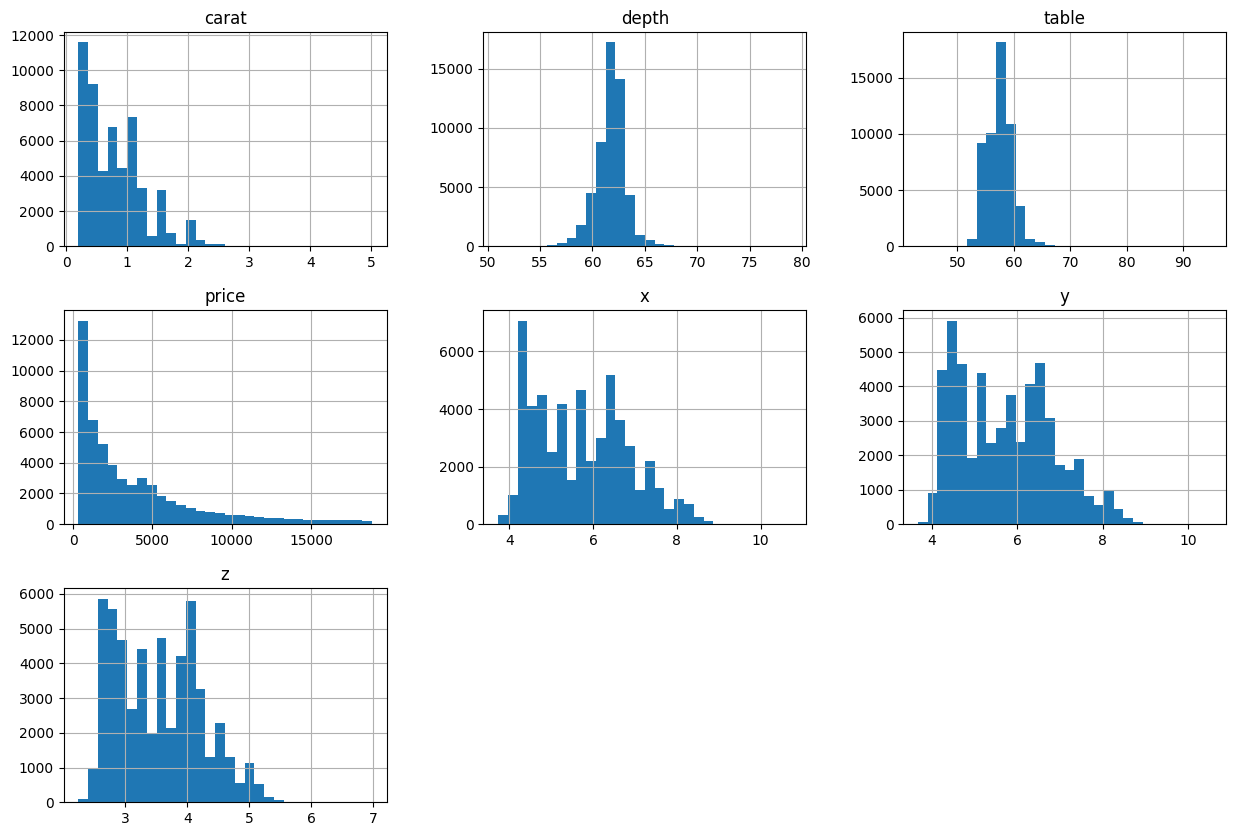

In [51]:
df.hist(bins=30, figsize=(15,10))

<Axes: ylabel='price'>

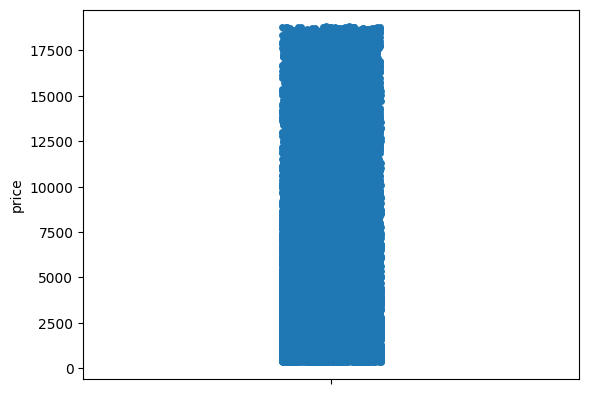

In [52]:
sns.stripplot(data=df['price'])

<Axes: ylabel='carat'>

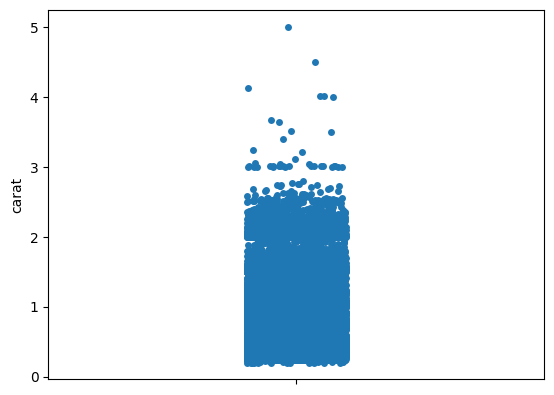

In [53]:
sns.stripplot(data=df['carat'])

In [54]:
df.query('carat >= 3').sort_values(by='carat')

,carat,cut,color,clarity,depth,table,price,x,y,z
16283,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
19346,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
23539,3.00,Good,E,I1,64.2,65.0,11548,9.08,8.96,5.79
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
24816,3.00,Premium,G,I1,59.7,60.0,13203,9.42,9.26,5.58
26933,3.00,Fair,I,SI2,64.8,59.0,16970,8.93,8.73,5.72
26932,3.00,Premium,I,SI2,60.7,59.0,16970,9.30,9.14,5.60
25850,3.00,Good,J,SI2,59.3,64.0,14918,9.32,9.19,5.50
25460,3.01,Premium,G,SI2,59.8,58.0,14220,9.44,9.37,5.62
27515,3.01,Fair,I,SI2,65.8,56.0,18242,8.99,8.94,5.90


<Axes: ylabel='depth'>

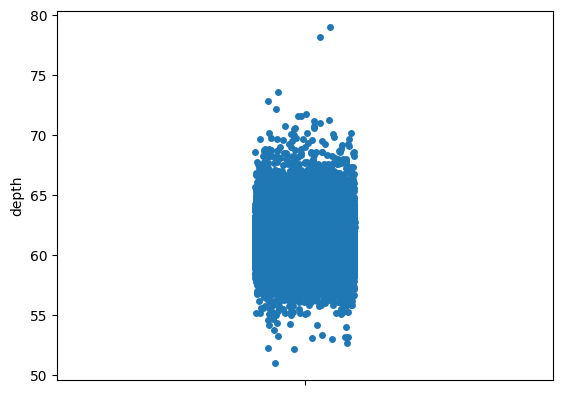

In [55]:
sns.stripplot(data=df['depth'])

In [56]:
df.query('depth > 75')

,carat,cut,color,clarity,depth,table,price,x,y,z
41918,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


<Axes: ylabel='table'>

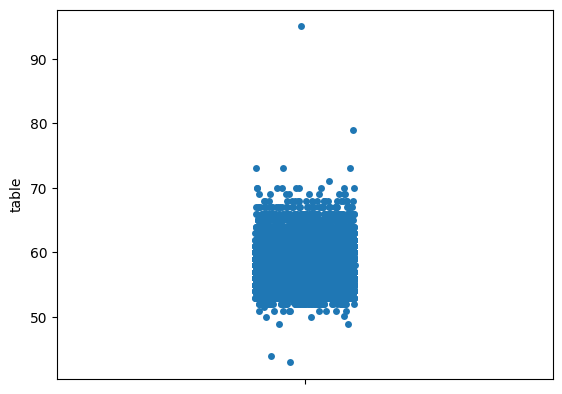

In [57]:
sns.stripplot(data=df['table'])

In [58]:
df.query('table > 90')

,carat,cut,color,clarity,depth,table,price,x,y,z
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


<Axes: xlabel='x', ylabel='y'>

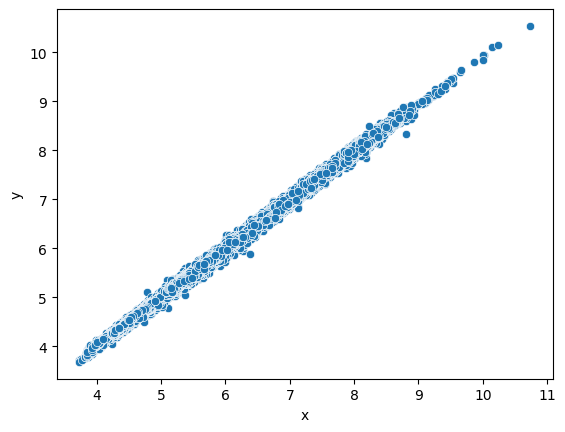

In [59]:
sns.scatterplot(data=df, x='x', y='y')

<Axes: ylabel='z'>

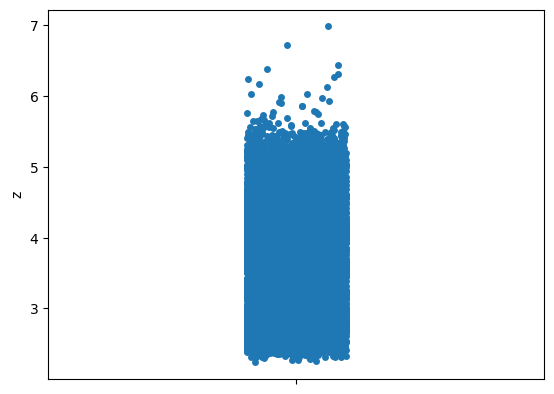

In [60]:
sns.stripplot(data=df['z'])

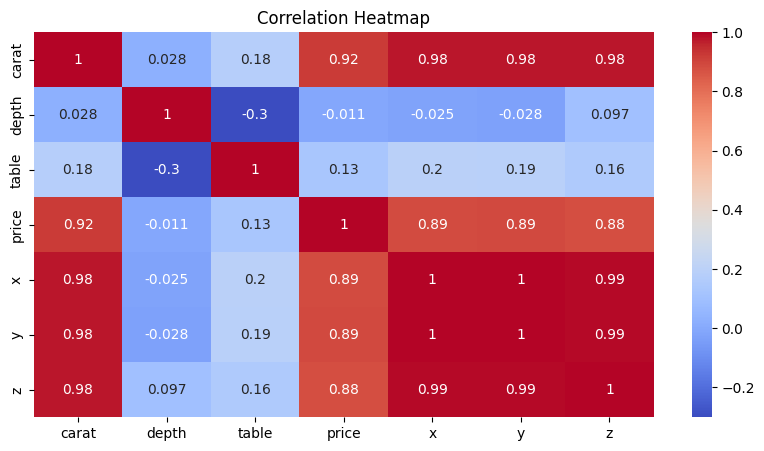

In [61]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

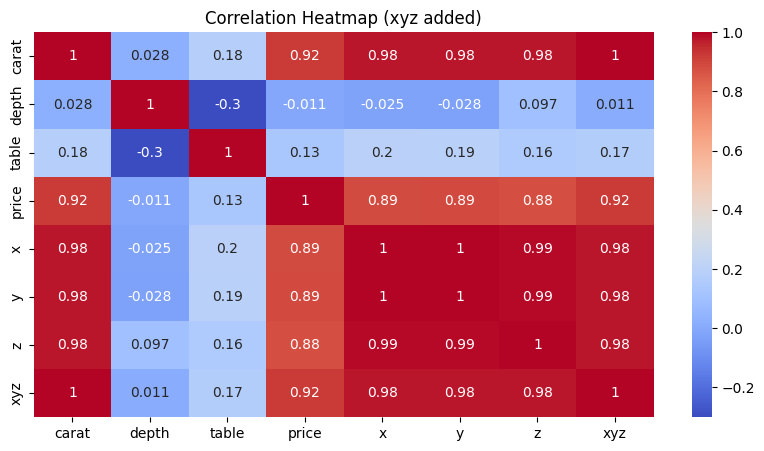

In [62]:
df['xyz'] = (df['x'] * df['y'] * df['z']).round(1)

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (xyz added)')
plt.show()

In [63]:
df = df.drop(columns=['x', 'y', 'z', 'xyz'])
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


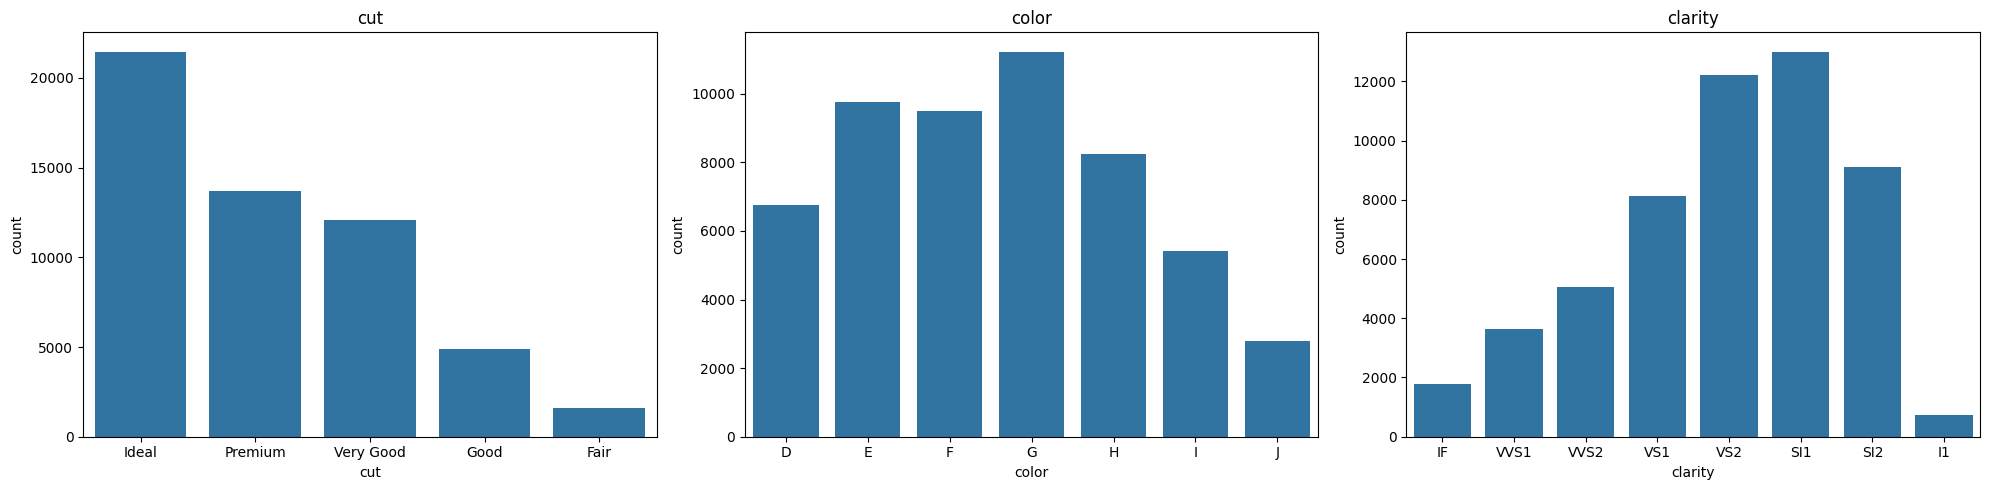

In [64]:
categories = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for ax, cat in zip(axes, categories):
    sns.countplot(data=df, x=cat, ax=ax)
    ax.set_title(cat)

plt.tight_layout()
plt.show()

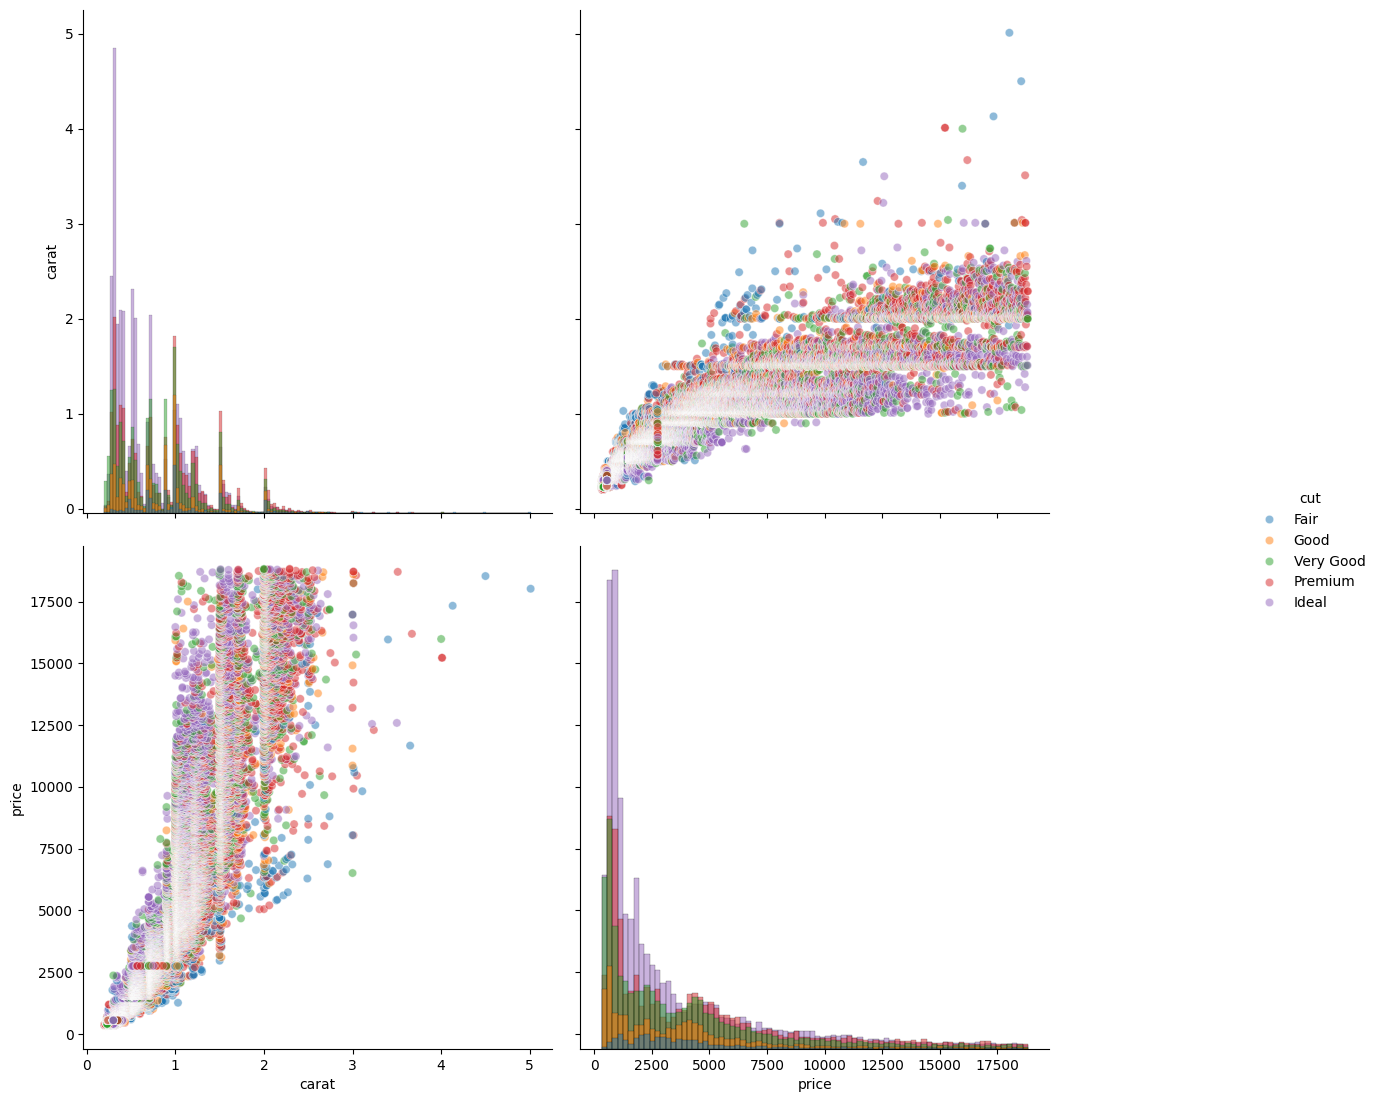

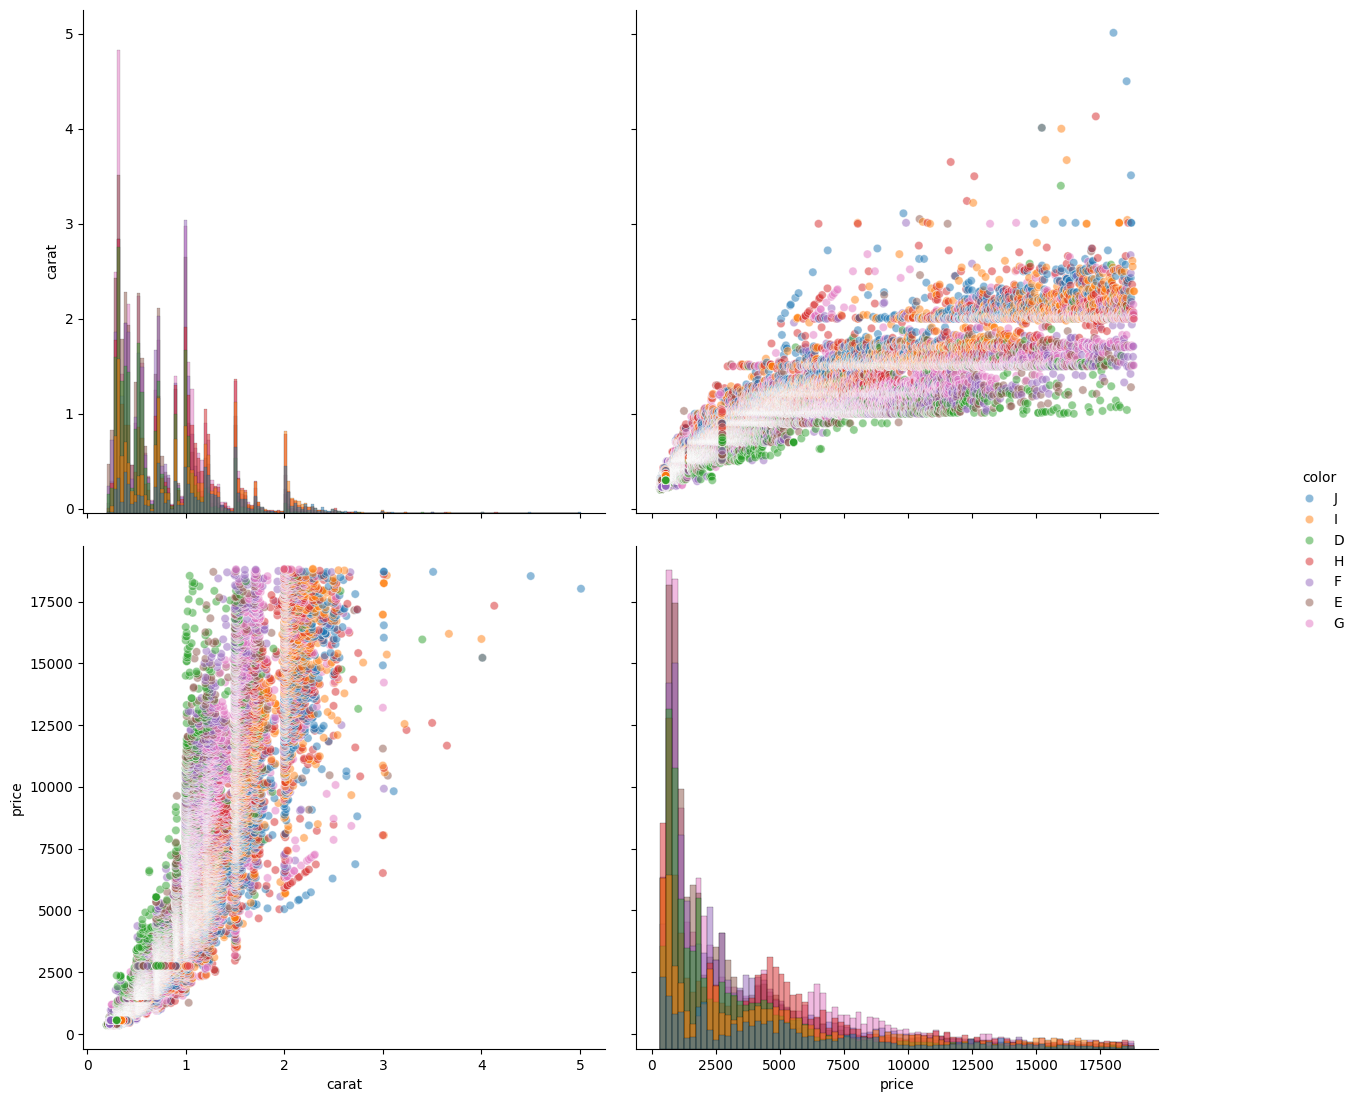

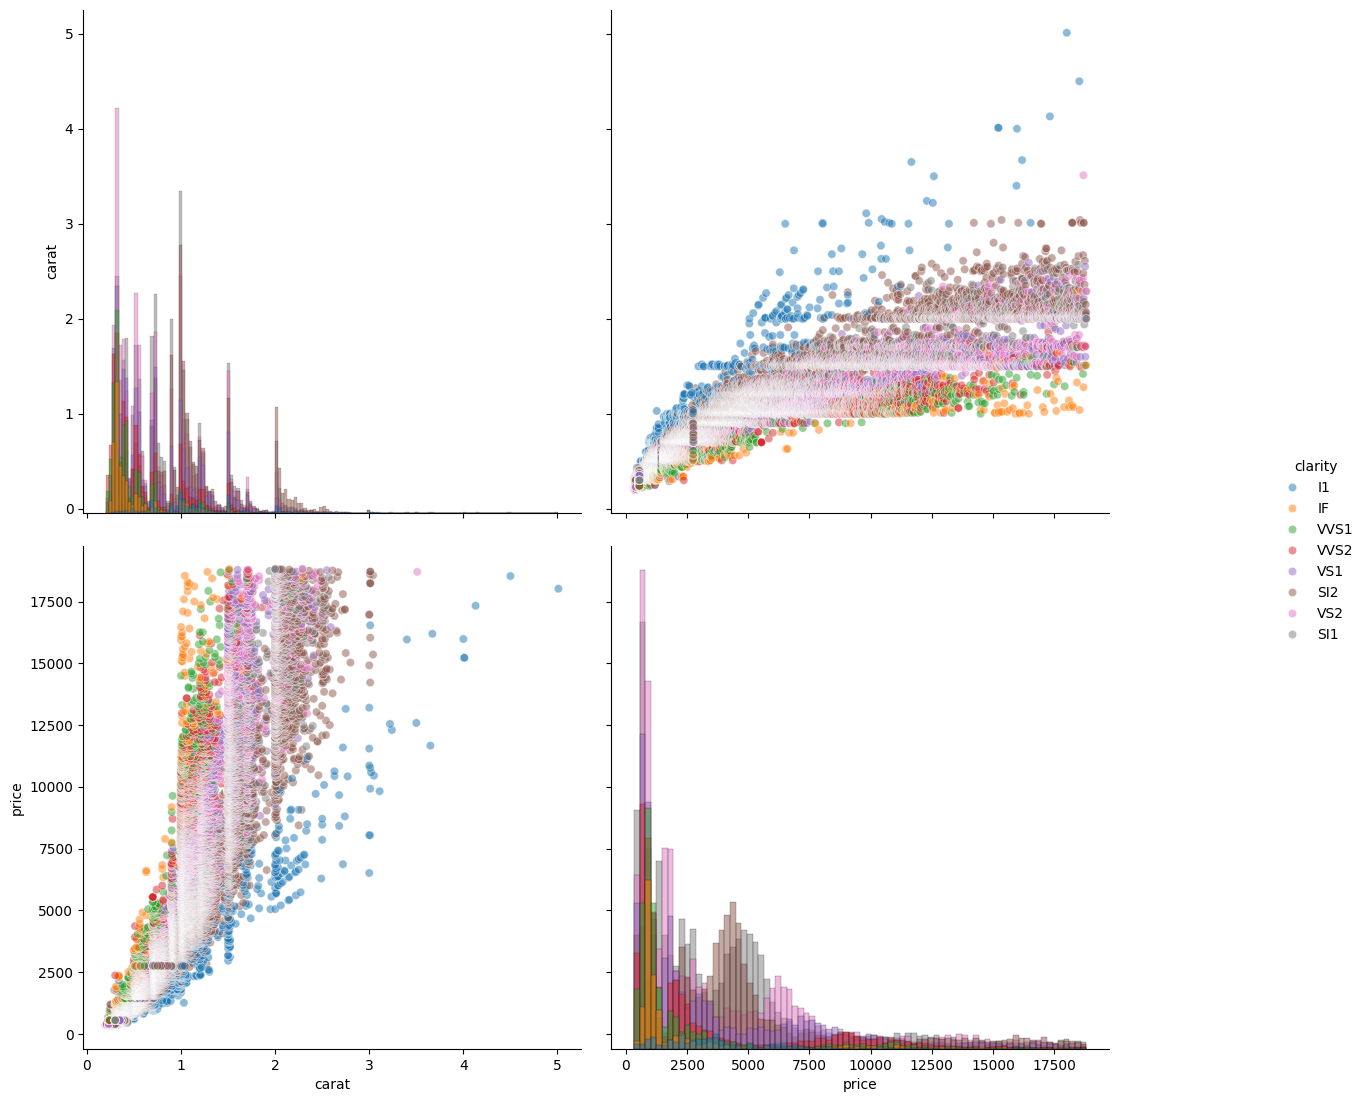

In [65]:
columns = ['cut', 'color', 'clarity']

for col in columns:
    hue_order = df[col].value_counts(ascending=True).index.tolist()
    pairplot = sns.pairplot(df, hue=col, vars=['carat', 'price'], diag_kind='hist', hue_order=hue_order, plot_kws={'alpha': 0.5})
    pairplot.fig.set_size_inches(15, 12)
    plt.show()

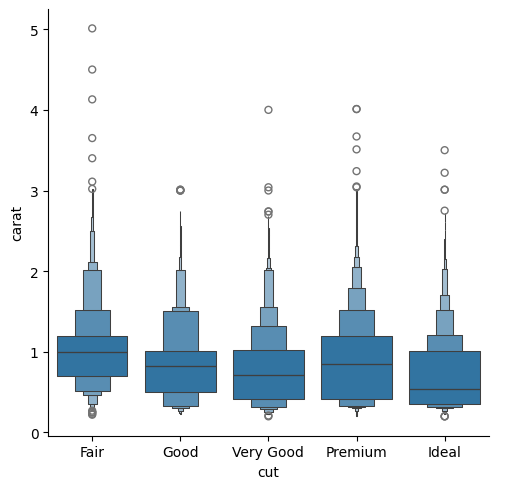

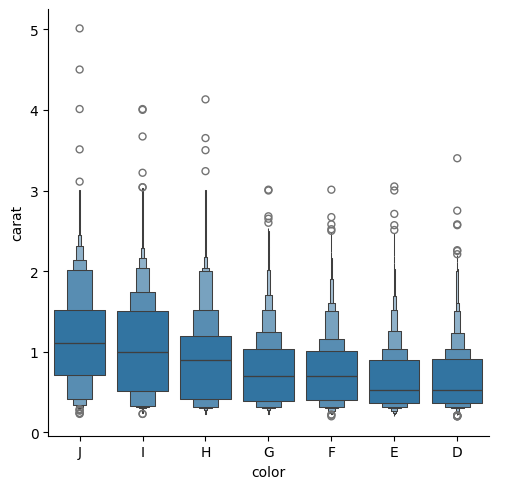

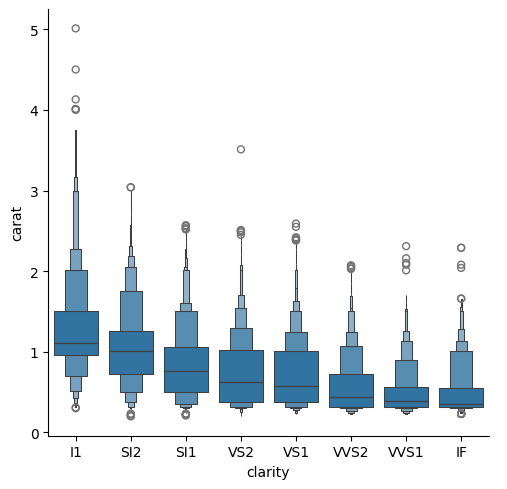

In [66]:
category_orders = {
    'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
}

for col, order in category_orders.items():
    sns.catplot(data=df, x=col, y='carat', kind='boxen', order=order)

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
category_orders = {
    'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
}

encoder = OrdinalEncoder(categories=[category_orders['cut'], category_orders['color'], category_orders['clarity']])
df[['cut', 'color', 'clarity']] = encoder.fit_transform(df[['cut', 'color', 'clarity']])
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,4.0,5.0,1.0,61.5,55.0,326
1,0.21,3.0,5.0,2.0,59.8,61.0,326
2,0.23,1.0,5.0,4.0,56.9,65.0,327
3,0.29,3.0,1.0,3.0,62.4,58.0,334
4,0.31,1.0,0.0,1.0,63.3,58.0,335


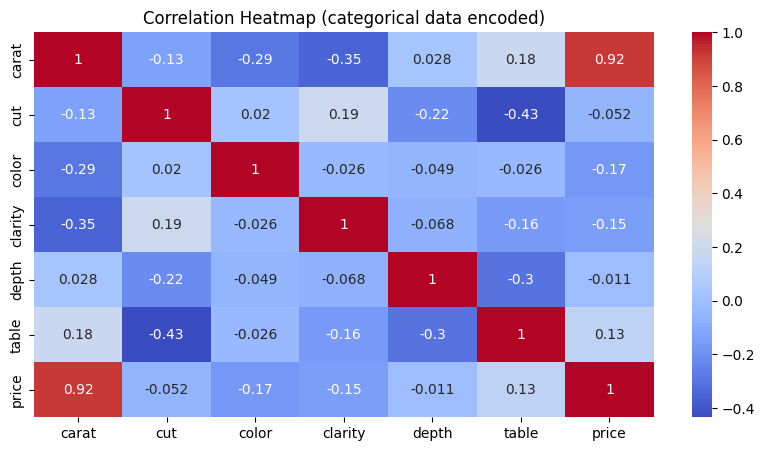

In [69]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (categorical data encoded)')
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [71]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(columns=['price']), df['price'], test_size=0.3, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'ElasticNet(l1=0.3)': ElasticNet(l1_ratio=0.3),
    'ElasticNet(l1=0.7)': ElasticNet(l1_ratio=0.7),
}

for name, model in models.items():
    model.fit(train_X, train_y)
    print(f'{name} (Train Data): {model.score(train_X, train_y):.3f}')
    print(f'{name} (Test Data): {model.score(test_X, test_y):.3f}')
    print()

LinearRegression (Train Data): 0.905
LinearRegression (Test Data): 0.904

Lasso (Train Data): 0.905
Lasso (Test Data): 0.904

Ridge (Train Data): 0.905
Ridge (Test Data): 0.904

ElasticNet (Train Data): 0.444
ElasticNet (Test Data): 0.444

ElasticNet(l1=0.3) (Train Data): 0.368
ElasticNet(l1=0.3) (Test Data): 0.368

ElasticNet(l1=0.7) (Train Data): 0.569
ElasticNet(l1=0.7) (Test Data): 0.569



XGBoost (Train Data): 0.989
XGBoost (Test Data): 0.982


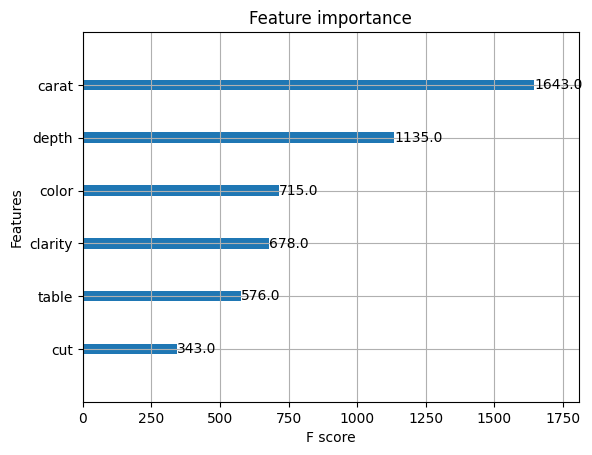

In [72]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(train_X, train_y)
print(f'XGBoost (Train Data): {xgb_model.score(train_X, train_y):.3f}')
print(f'XGBoost (Test Data): {xgb_model.score(test_X, test_y):.3f}')

# 特徴量の重要度をプロット
xgb.plot_importance(xgb_model)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 37585, number of used features: 6
[LightGBM] [Info] Start training from score 3943.086843
LightGBM (Train Data): 0.986
LightGBM (Test Data): 0.982


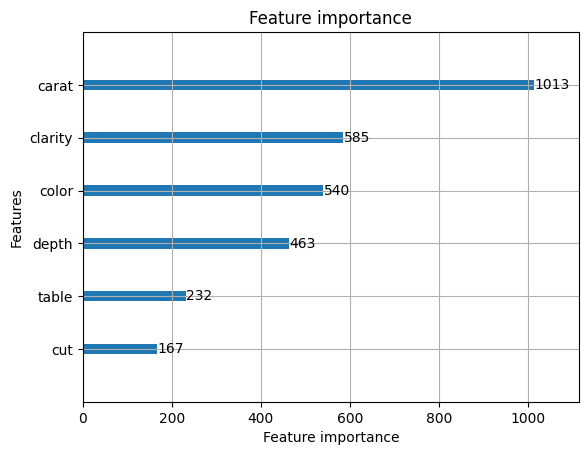

In [73]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(train_X, train_y)
print(f'LightGBM (Train Data): {lgb_model.score(train_X, train_y):.3f}')
print(f'LightGBM (Test Data): {lgb_model.score(test_X, test_y):.3f}')

# 特徴量の重要度をプロット
lgb.plot_importance(lgb_model)
plt.show()

RandomForest (Train Data): 0.997
RandomForest (Test Data): 0.981


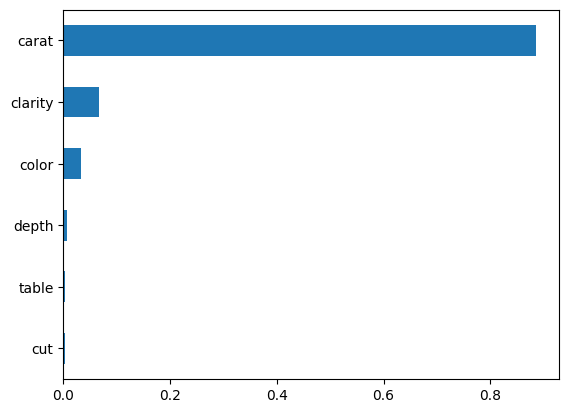

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
print(f'RandomForest (Train Data): {rf_model.score(train_X, train_y):.3f}')
print(f'RandomForest (Test Data): {rf_model.score(test_X, test_y):.3f}')

# 特徴量の重要度を取得
importance = pd.Series(rf_model.feature_importances_, index=df.drop(columns=['price']).columns)
importance.sort_values().plot(kind='barh')
plt.show()